# 手写数字

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 读取数据

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_all.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

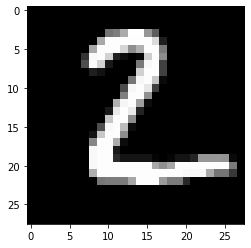

In [5]:
plt.imshow(x_test[1], cmap='gray')

In [6]:
y_test[1]

2

In [7]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [8]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 标准化处理

In [9]:
# 对数据进行标准化处理, 
# x - u / s
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

## 定义网络

In [10]:
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 另一种写法. 
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

## 配置模型

In [11]:
# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

## 训练模型

In [12]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.9049 - val_loss: 0.1796 - val_accuracy: 0.9520
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1612 - accuracy: 0.9532 - val_loss: 0.1323 - val_accuracy: 0.9632
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1168 - accuracy: 0.9668 - val_loss: 0.1155 - val_accuracy: 0.9666
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0917 - accuracy: 0.9743 - val_loss: 0.0973 - val_accuracy: 0.9726
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9791 - val_loss: 0.0899 - val_accuracy: 0.9744
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0614 - accuracy: 0.9836 - val_loss: 0.0783 - val_accuracy: 0.9776
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9867 - val_loss: 0.0763 - val_accuracy:

In [13]:
history.history

{'loss': [0.3332606554031372,
  0.1611926257610321,
  0.11680716276168823,
  0.09174427390098572,
  0.07461527734994888,
  0.06143670156598091,
  0.05119648575782776,
  0.04311952367424965,
  0.036723557859659195,
  0.031397029757499695],
 'accuracy': [0.904872715473175,
  0.9532181620597839,
  0.9668363928794861,
  0.9742545485496521,
  0.9791091084480286,
  0.9836000204086304,
  0.9867272973060608,
  0.9889090657234192,
  0.990781843662262,
  0.9927818179130554],
 'val_loss': [0.17955578863620758,
  0.13231486082077026,
  0.11546114832162857,
  0.09729868173599243,
  0.0899389460682869,
  0.07831080257892609,
  0.07634864747524261,
  0.07225549966096878,
  0.07044936716556549,
  0.06845548748970032],
 'val_accuracy': [0.9520000219345093,
  0.9631999731063843,
  0.9666000008583069,
  0.972599983215332,
  0.974399983882904,
  0.9775999784469604,
  0.9783999919891357,
  0.979200005531311,
  0.9800000190734863,
  0.9797999858856201]}

In [14]:
import pandas as pd

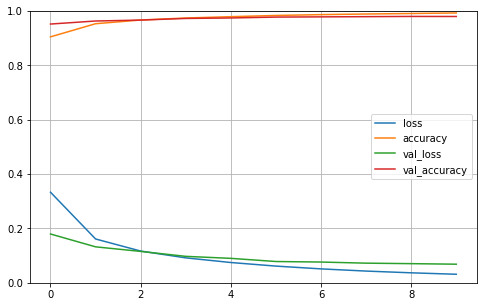

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

## 模型验证

In [16]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9776


[0.07001440972089767, 0.9775999784469604]

## 过拟合怎么办. 正则化的方法: L1, L2, droptout, BN, 

In [17]:
# l1正则
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu',kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 30.0515 - accuracy: 0.8118 - val_loss: 1.5832 - val_accuracy: 0.8362
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4645 - accuracy: 0.8432 - val_loss: 1.3604 - val_accuracy: 0.8682
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3351 - accuracy: 0.8553 - val_loss: 1.2588 - val_accuracy: 0.8726
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2601 - accuracy: 0.8620 - val_loss: 1.2075 - val_accuracy: 0.8740
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2054 - accuracy: 0.8690 - val_loss: 1.1517 - val_accuracy: 0.8818
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1671 - accuracy: 0.8722 - val_loss: 1.1472 - val_accuracy: 0.8782
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1376 - accuracy: 0.8737 - val_loss: 1.1024 - val_accuracy

In [18]:
# l2正则
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 7.3547 - accuracy: 0.9038 - val_loss: 5.1354 - val_accuracy: 0.9410
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 3.8028 - accuracy: 0.9450 - val_loss: 2.7235 - val_accuracy: 0.9558
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.0637 - accuracy: 0.9517 - val_loss: 1.5197 - val_accuracy: 0.9610
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1875 - accuracy: 0.9567 - val_loss: 0.9067 - val_accuracy: 0.9642
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7414 - accuracy: 0.9595 - val_loss: 0.5989 - val_accuracy: 0.9642
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5120 - accuracy: 0.9635 - val_loss: 0.4374 - val_accuracy: 0.9662
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3916 - accuracy: 0.9654 - val_loss: 0.3491 - val_accuracy:

In [19]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9662


[0.2686920166015625, 0.9661999940872192]

In [20]:
# dropout
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# 改进版的dropout, 1: 均值和方差不变. 2. 归一化的性质也不变. 
model.add(tf.keras.layers.AlphaDropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9934 - accuracy: 0.6647 - val_loss: 0.4574 - val_accuracy: 0.8958
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5715 - accuracy: 0.8154 - val_loss: 0.3944 - val_accuracy: 0.9118
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4815 - accuracy: 0.8469 - val_loss: 0.3571 - val_accuracy: 0.9250
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4308 - accuracy: 0.8646 - val_loss: 0.3155 - val_accuracy: 0.9356
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3915 - accuracy: 0.8768 - val_loss: 0.2988 - val_accuracy: 0.9378
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8845 - val_loss: 0.2696 - val_accuracy: 0.9430
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.8931 - val_loss: 0.2531 - val_accuracy:

In [21]:
# BN, 
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2830 - accuracy: 0.9153 - val_loss: 0.1250 - val_accuracy: 0.9640
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9629 - val_loss: 0.0968 - val_accuracy: 0.9724
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.9737 - val_loss: 0.0830 - val_accuracy: 0.9770
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9804 - val_loss: 0.0754 - val_accuracy: 0.9794
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0552 - accuracy: 0.9848 - val_loss: 0.0730 - val_accuracy: 0.9792
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9882 - val_loss: 0.0711 - val_accuracy: 0.9792
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9905 - val_loss: 0.0689 - val_accuracy:

In [22]:
# 把BN放在激活之前
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3528 - accuracy: 0.9023 - val_loss: 0.1563 - val_accuracy: 0.9576
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1734 - accuracy: 0.9501 - val_loss: 0.1161 - val_accuracy: 0.9684
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9640 - val_loss: 0.0975 - val_accuracy: 0.9748
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1036 - accuracy: 0.9710 - val_loss: 0.0861 - val_accuracy: 0.9762
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9762 - val_loss: 0.0792 - val_accuracy: 0.9782
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0717 - accuracy: 0.9803 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9837 - val_loss: 0.0685 - val_accuracy:

## 深度网络

In [23]:
# Deep Nerual Network
model = tf.keras.models.Sequential()
# 定义输入数据的格式. 
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 配置模型
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 7ms/step - loss: 0.7541 - accuracy: 0.7694 - val_loss: 0.2537 - val_accuracy: 0.9292
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3564 - accuracy: 0.8974 - val_loss: 0.1445 - val_accuracy: 0.9596
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2547 - accuracy: 0.9280 - val_loss: 0.1171 - val_accuracy: 0.9702
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2019 - accuracy: 0.9426 - val_loss: 0.1063 - val_accuracy: 0.9712
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1653 - accuracy: 0.9536 - val_loss: 0.1078 - val_accuracy: 0.9668
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1421 - accuracy: 0.9591 - val_loss: 0.1004 - val_accuracy: 0.9710
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1247 - accuracy: 0.9652 - val_loss: 0.0870 - val_ac

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                      

 dense_35 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_21 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_22 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
          

In [25]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.9747


[0.08529359102249146, 0.9746999740600586]

1. 参数多了, 容易训练不充分. 
2. 容易梯度消失/梯度爆炸. 

# 基于TensorFlow的CiFar10物品分类项目

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## 加载数据

In [28]:
# cifar10 
(x_train_all, y_train_all), (x_test, y_test) =tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 17433s 102us/step


In [29]:
x_train_all.shape

(50000, 32, 32, 3)

In [30]:
x_test.shape

(10000, 32, 32, 3)

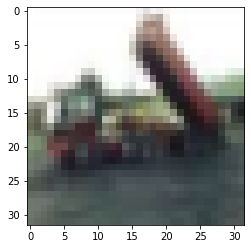

In [32]:
plt.imshow(x_train_all[2])

In [33]:
y_train_all[2]

array([9], dtype=uint8)

In [34]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [35]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

## 标准化处理

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)

## 构建网络

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [38]:
# 配置网络
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_39 (Dense)            (None, 512)               1573376   
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7609 - acc: 0.3853 - val_loss: 1.6069 - val_acc: 0.4260
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5362 - acc: 0.4549 - val_loss: 1.5104 - val_acc: 0.4678
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4449 - acc: 0.4875 - val_loss: 1.5179 - val_acc: 0.4640
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3737 - acc: 0.5138 - val_loss: 1.4688 - val_acc: 0.4854
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3019 - acc: 0.5391 - val_loss: 1.4849 - val_acc: 0.4836
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2421 - acc: 0.5615 - val_loss: 1.4659 - val_acc: 0.5024
Epoch 7/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1893 - acc: 0.5807 - val_loss: 1.4706 - val_acc: 0.5146
Epoch 8/10
1407/1407 [==============================] -

## 构建深度神经网络

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               1573376   
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dense_44 (Dense)            (None, 512)               262656    
                                                                 
 dense_45 (Dense)            (None, 512)               262656    
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 512)              

In [42]:
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 41s 28ms/step - loss: 2.1274 - acc: 0.1683 - val_loss: 2.0384 - val_acc: 0.1812
Epoch 2/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.9799 - acc: 0.2191 - val_loss: 1.9370 - val_acc: 0.2336
Epoch 3/10
1407/1407 [==============================] - 43s 31ms/step - loss: 1.8885 - acc: 0.2650 - val_loss: 1.9205 - val_acc: 0.2578
Epoch 4/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.8511 - acc: 0.2816 - val_loss: 1.8536 - val_acc: 0.2756
Epoch 5/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.8193 - acc: 0.2876 - val_loss: 1.8431 - val_acc: 0.2710
Epoch 6/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.8103 - acc: 0.2924 - val_loss: 1.8292 - val_acc: 0.2914
Epoch 7/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.8029 - acc: 0.2931 - val_loss: 1.8851 - val_acc: 0.2712
Epoch 8/10
1407/1407 [==========================

结论: 尽量不用深层的神经网络. 

In [43]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               1573376   
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dense_44 (Dense)            (None, 512)               262656    
                                                                 
 dense_45 (Dense)            (None, 512)               262656    
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 512)              

## 过拟合问题

### l1

In [44]:
# 过拟合问题
# l1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 16s 11ms/step - loss: 9.7461 - acc: 0.1087 - val_loss: 4.1100 - val_acc: 0.0972
Epoch 2/10
1407/1407 [==============================] - 15s 11ms/step - loss: 4.1062 - acc: 0.0979 - val_loss: 4.1059 - val_acc: 0.0996
Epoch 3/10
1407/1407 [==============================] - 16s 11ms/step - loss: 4.1037 - acc: 0.0978 - val_loss: 4.1035 - val_acc: 0.0972
Epoch 4/10
1407/1407 [==============================] - 16s 11ms/step - loss: 4.1051 - acc: 0.0981 - val_loss: 4.1040 - val_acc: 0.0920
Epoch 5/10
1407/1407 [==============================] - 16s 11ms/step - loss: 4.1040 - acc: 0.0999 - val_loss: 4.1044 - val_acc: 0.0976
Epoch 6/10
1407/1407 [==============================] - 16s 11ms/step - loss: 4.1041 - acc: 0.0996 - val_loss: 4.1034 - val_acc: 0.0920
Epoch 7/10
1407/1407 [==============================] - 16s 11ms/step - loss: 4.1041 - acc: 0.0964 - val_loss: 4.1059 - val_acc: 0.0972
Epoch 8/10
1407/1407 [==========================

### l2

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 17s 12ms/step - loss: 3.3586 - acc: 0.3469 - val_loss: 2.0005 - val_acc: 0.3580
Epoch 2/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.9671 - acc: 0.3751 - val_loss: 1.9361 - val_acc: 0.3920
Epoch 3/10
1407/1407 [==============================] - 16s 12ms/step - loss: 1.9396 - acc: 0.3910 - val_loss: 1.9507 - val_acc: 0.3762
Epoch 4/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.9138 - acc: 0.4004 - val_loss: 1.9213 - val_acc: 0.3922
Epoch 5/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8653 - acc: 0.4080 - val_loss: 1.8616 - val_acc: 0.3980
Epoch 6/10
1407/1407 [==============================] - 16s 12ms/step - loss: 1.8256 - acc: 0.4125 - val_loss: 1.7717 - val_acc: 0.4182
Epoch 7/10
1407/1407 [==============================] - 16s 12ms/step - loss: 1.7985 - acc: 0.4171 - val_loss: 1.7933 - val_acc: 0.4194
Epoch 8/10
1407/1407 [==========================

### AlphaDropout

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9397 - acc: 0.3233 - val_loss: 1.8113 - val_acc: 0.4014
Epoch 2/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6924 - acc: 0.3986 - val_loss: 1.7494 - val_acc: 0.4534
Epoch 3/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.6308 - acc: 0.4211 - val_loss: 1.7281 - val_acc: 0.4446
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5841 - acc: 0.4360 - val_loss: 1.7399 - val_acc: 0.4664
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5556 - acc: 0.4498 - val_loss: 1.7178 - val_acc: 0.4726
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5312 - acc: 0.4611 - val_loss: 1.8157 - val_acc: 0.4624
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5041 - acc: 0.4679 - val_loss: 1.7579 - val_acc: 0.4772
Epoch 8/10
1407/1407 [==============================] - 10

### BN

In [47]:
# BN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.AlphaDropout(0.5))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 11s 7ms/step - loss: 1.9563 - acc: 0.2936 - val_loss: 1.7948 - val_acc: 0.4086
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7930 - acc: 0.3532 - val_loss: 1.7791 - val_acc: 0.4226
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7208 - acc: 0.3815 - val_loss: 1.8756 - val_acc: 0.4092
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6711 - acc: 0.3995 - val_loss: 1.7239 - val_acc: 0.4390
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6249 - acc: 0.4164 - val_loss: 1.8015 - val_acc: 0.4326
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5967 - acc: 0.4249 - val_loss: 1.7050 - val_acc: 0.4534
Epoch 7/10
1407/1407 [==============================] - 11s 7ms/step - loss: 1.5720 - acc: 0.4373 - val_loss: 1.6422 - val_acc: 0.4682
Epoch 8/10
1407/1407 [==============================] -